## In Jupyter Notebook run first

In [4]:
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#from plotly.offline.offline import _plot_html
import numpy as np
import cufflinks as cf
pd.set_option("display.max_rows",1000)
init_notebook_mode()
%reload_ext autoreload
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/imports
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/API
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/global_vars_and_constants
%run -i C:/Users/champ/Python_proj/base_financial_repo/Econometric_data_repo/meta_data/functions

ModuleNotFoundError: No module named 'cufflinks'

# Main

Today the market was open and the 
sectors price data is NOT updated

security : xlp

security : xle

security : xlv

security : xli

security : xlb

security : xlk

security : iyt

security : xlu

security : vcr

security : vfh

security : vnq

security : spy


<ipython-input-116-0f0a487913bd>:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-116-0f0a487913bd>:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\champ\Python_proj\base_financial_repo\Econometric_data_repo\meta_data\functions.py:448: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index


Last run: 2020-08-05 00:27:11.039710
The last 20 years of price data
Market analysis end timestamp : 16

The ascending mean return for 1,3,6,12mo ranking for 11 sectors are :
Ticker  Av_ret            category  Div yeild / yr  Div - exp  Expense ratio   EX_date_x Future_EX_date  Days_left     reg_Vol
   xlk    26.6          Technology            1.15       1.02           0.13  2020-06-22     2020-10-11       68.0   8782367.0
   vcr    19.6   Consumer Cyclical            1.13       1.03           0.10  2020-06-22     2020-10-24       81.0     48161.0
   xlv    10.3              Health            2.27       2.14           0.13  2020-06-22     2020-10-11       68.0   5019353.0
   spy     9.9         Large Blend            1.85       1.76           0.09  2020-06-19     2020-10-08       65.0  41917893.0
   xlb     8.5   Natural Resources            2.14       2.01           0.13  2020-06-22     2020-10-11       68.0   7725911.0
   xlp     7.4  Consumer Defensive            2.76       2.63 

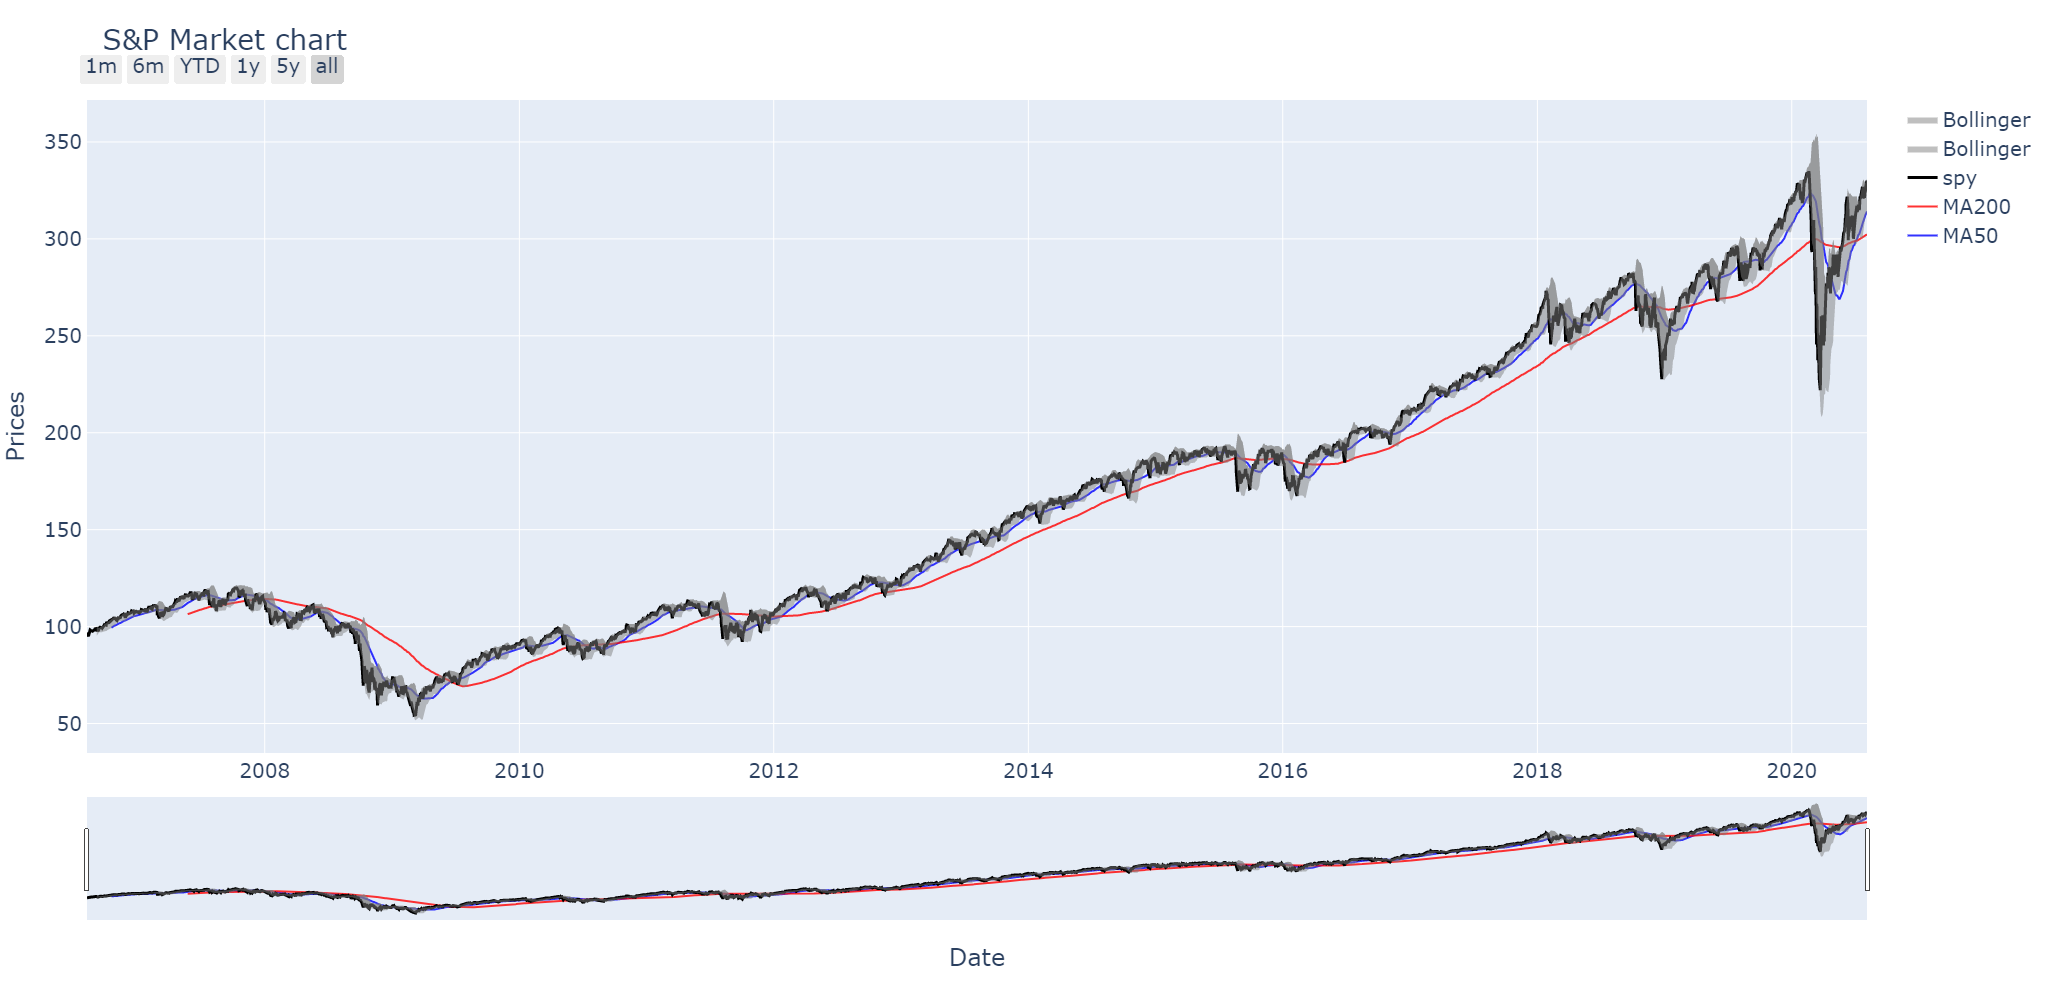

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [116]:
%matplotlib widget
df_sec = update_securities_df(Securities_file_import_from_csv, update = False)

# Relative strength indicator and economic indicators

# df = update_securities_df(Securities_file_import_from_csv)

# Local variables
#accounts = ['sectors','inx']
data_type='Adj Close'
# force_update = False # Force download of financial data
# df = df.loc[(df['Type'] == 'sector') | (df['Type'] == 'inx')]
# df = df['Ticker'].values.tolist()

# for ARRAY in df: 
#     prices_file = META_FILE_FOLDER_LOCATION +'prices_'+ARRAY+'.csv'
# #     if ARRAY == 'sectors': 
# #         securities = ['xlp', 'xle', 'xlv', 'xli', 'xlb',
# #                       'xlk', 'iyt', 'xlu', 'vcr', 'vfh', 'vnq']
        
#         sector_price_data = get_prices(df, account, prices_file, 
#                                        data_type, start_date, force_update)
        
#     for index,rows in df.iterrows():
#         if rows['Type'] == 'sector':
#             prices_file = META_FILE_FOLDER_LOCATION +'prices_'+rows['Ticker']+'.csv'
#             sector_price_data = get_prices(rows['Ticker'], account, prices_file, 
#                                            data_type, start_date, force_update)
        

df = df_sec
df = df.loc[(df['Type'] == 'sector') | (df['Type'] == 'inx')]
df = df['Ticker'].values.tolist()

sector_price_data = get_prices(df, account = SECURITY_ARRAY[0], 
                               FOLDER_LOCATION = META_FILE_FOLDER_LOCATION,
                               data_type = 'Adj Close', start_date = start_date, force_update = False)

    
inx_price_data = sector_price_data[[INX]]
#inx_price_data = inx_price_data.rename(columns={inx_price_data[0]: INX })
inx_price_data['MA50_index']=inx_price_data[INX].rolling(50).mean()
inx_price_data['MA200_index']=inx_price_data[INX].rolling(200).mean()
#inx_price_data.index = pd.to_datetime(inx_price_data.index)

#  Function calls
Market_indicator_signal,mkt_ind = get_mkt_indicator(inx_price_data)
Average_return = _1_3_6_9_12_month_returns(sector_price_data)
FRED_data_mort = get_FRED_data('MORTGAGE30US','mort',start_date,0,1,FRED_API)
FRED_data_LEI = get_FRED_data('USSLIND','LEI',start_date,0,1,FRED_API)
FRED_data_inf = get_FRED_data('CPILFESL','inf',start_date,12,100,FRED_API)
FRED_data_10_2 = get_FRED_data('T10Y2Y','10_2',start_date,0,1,FRED_API)
FRED_data_RF = get_FRED_data('DTB3','RF',start_date,0,1,FRED_API)
FRED_data_ICSA = get_FRED_data('ICSA','UnEmp',start_date,52,1,FRED_API)

combined_12_mo_return = pd.concat([FRED_data_RF, FRED_data_inf,
                                  FRED_data_LEI, FRED_data_mort,
                                  FRED_data_10_2, FRED_data_ICSA], 
                                  axis=1, sort=False)
combined_12_mo_return = combined_12_mo_return.fillna(method='ffill')
combined_12_mo_return = combined_12_mo_return.fillna(method='bfill')
bollinger_bands_graph(inx_price_data,INX);

#  Display
display = display_relative_strength(Average_return,
                                    Market_indicator_signal,
                                    mkt_ind,
                                    securities_file_location)

# S&P CHART
font = 1.0
inx_price_data = inx_price_data.reset_index()
Upper_bollinger = go.Scatter(x=inx_price_data['Date'],
                        y=inx_price_data['Upper Band'],
                                                     fill = "tonexty",
                        line=go.scatter.Line(color='gray', width = font*.0001),
                           opacity=0.8,
                           name='Bollinger',
                           text='Bollinger')

Lower_bollinger = go.Scatter(x=inx_price_data['Date'],
                        y=inx_price_data['Lower Band'],
                             fill = "tonexty",
                        line=go.scatter.Line(color='gray', width = font*.0001),
                           opacity=0.8,
                           name='Bollinger',
                           text='Bollinger')


price_data = go.Scatter(x=inx_price_data['Date'],
                        y=inx_price_data['spy'],
                        line=go.scatter.Line(color='black', width = font*3),
                           opacity=0.8,
                           name='spy',
                           text='price')

shrt_MA_data = go.Scatter(x=inx_price_data['Date'],
                        y=inx_price_data['MA50_index'],
                        line=go.scatter.Line(color='blue', width = font*2),
                           opacity=0.8,
                           name='MA50',
                           text='MA50')

long_MA_data = go.Scatter(x=inx_price_data['Date'],
                        y=inx_price_data['MA200_index'],
                        line=go.scatter.Line(color='red', width = font*2),
                           opacity=0.8,
                           name='MA200',
                           text='MA200')



layout = go.Layout(height=1000, width=1600, font=dict(size=20),
                   title='S&P Market chart',
                    yaxis=dict(title='Prices'),
                   xaxis=dict(title='Date',
                           rangeslider=dict(visible=True),
                           rangeselector=dict(
                           buttons=list([
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=6, label="6m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(count=6, label="5y", step="year", stepmode="backward"),
                        dict(step="all")
                ]))))


fig = go.Figure(data=[shrt_MA_data, long_MA_data, price_data, Upper_bollinger, Lower_bollinger], layout=layout)
iplot(fig)

display4 = econometric_graph(combined_12_mo_return);